<a href="https://colab.research.google.com/github/Rahaf-altuwairesh/Data-Analysis-and-Machine-Learning-STC-Jawwy-dataset-/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STC Jawwy

In [ ]:
"""
Here we install libraries that are not installed by default
Example:  pyslsb
Feel free to add any library you are planning to use.
"""
!pip install pyxlsb

In [ ]:
# Import the required libraries
"""
Please feel free to import any required libraries as per your needs
"""
import pandas as pd     # provides high-performance, easy to use structures and data analysis tools
import pyxlsb           # Excel extention to read xlsb files (the input file)
import numpy as np      # provides fast mathematical computation on arrays and matrices

# Jawwy dataset
The dataset includes total watching hours for customers per day.

You are required to work on predecting the forecast for the watching hours.

In [ ]:
from google.colab import files
import pandas as pd
import io

# Upload the file
uploaded = files.upload()

# Display sheet names
for filename in uploaded.keys():
    xls = pd.ExcelFile(io.BytesIO(uploaded[filename]))
    print(f'Sheet names in {filename}: {xls.sheet_names}')

# Use the correct sheet name (replace 'Sheet1' with the correct name you get)
sheet_name = 'Sheet1'  # Replace with the correct sheet name
dataframe = pd.read_excel(io.BytesIO(uploaded[filename]), sheet_name=sheet_name)
print(dataframe.head())


Saving stc TV Data Set_T2 .xlsx to stc TV Data Set_T2 .xlsx
Sheet names in stc TV Data Set_T2 .xlsx: ['Sheet1']
   Unnamed: 0      date_  Total_watch_time_in_houres
0           0 2018-01-01                 1123.551944
1           1 2018-01-02                 1000.129722
2           2 2018-01-03                  881.924444
3           3 2018-01-04                  782.669444
4           4 2018-01-05                 1051.939444


In [ ]:
# check the data shape
dataframe.shape

(86, 3)

In [ ]:
# display the first 5 rows
dataframe.head()

,Unnamed: 0,date_,Total_watch_time_in_houres
0,0,2018-01-01,1123.551944
1,1,2018-01-02,1000.129722
2,2,2018-01-03,881.924444
3,3,2018-01-04,782.669444
4,4,2018-01-05,1051.939444


In [ ]:
# display the dataset after applying data types
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Unnamed: 0                  86 non-null     int64         
 1   date_                       86 non-null     datetime64[ns]
 2   Total_watch_time_in_houres  86 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.1 KB


In [ ]:
# describe the numeric values in the dataset
dataframe.describe()

,Unnamed: 0,date_,Total_watch_time_in_houres
count,86.000000,86,86.000000
mean,42.500000,2018-02-28 17:01:23.720930304,780.817926
min,0.000000,2018-01-01 00:00:00,562.124722
25%,21.250000,2018-01-30 06:00:00,707.709653
50%,42.500000,2018-02-28 12:00:00,763.181389
75%,63.750000,2018-03-29 18:00:00,840.985278
max,85.000000,2018-04-30 00:00:00,1123.551944
std,24.969982,NaN,122.992002


In [ ]:
# check if any column has null value in the dataset
dataframe.isnull().any()

,0
Unnamed: 0,False
date_,False
Total_watch_time_in_houres,False


In [ ]:
# we import Visualization libraries
# you can ignore and use any other graphing libraries
import matplotlib.pyplot as plt # a comprehensive library for creating static, animated, and interactive visualizations
import plotly #a graphing library makes interactive, publication-quality graphs. Examples of how to make line plots, scatter plots, area charts, bar charts, error bars, box plots, histograms, heatmaps, subplots, multiple-axes, polar charts, and bubble charts.
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
# Drop the 'Unnamed: 0' column as it only contains row numbers
dataframe = dataframe.drop(columns=['Unnamed: 0'])

# Convert the 'date_' column to datetime data type
dataframe['date_'] = pd.to_datetime(dataframe['date_'])

# Set 'date_' as the index
dataframe.set_index('date_', inplace=True)

# Display DataFrame after modifications
print(dataframe.head())


            Total_watch_time_in_houres
date_                                 
2018-01-01                 1123.551944
2018-01-02                 1000.129722
2018-01-03                  881.924444
2018-01-04                  782.669444
2018-01-05                 1051.939444


In [ ]:
# show the dataframe
fig = px.line(dataframe,  y="Total_watch_time_in_houres")
fig.show()


## TODO using the previous dataset (df) build a prediction model to predict the expected watch time for the next two months
Hint: you can build a forecast model to predict the results

In [ ]:
# Display the date range in the data
date_range = dataframe.index.min(), dataframe.index.max()
print(f"The date range of the data is from {date_range[0]} to {date_range[1]}")


The date range of the data is from 2018-01-01 00:00:00 to 2018-04-30 00:00:00


In [ ]:
# Display the number of data points for each time period
dataframe_resampled = dataframe.resample('M').size()  # Monthly
print("Monthly distribution of data:")
print(dataframe_resampled)


Monthly distribution of data:
date_
2018-01-31    23
2018-02-28    20
2018-03-31    22
2018-04-30    21
Freq: ME, dtype: int64


<ipython-input-13-71a2fd178332>:2: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



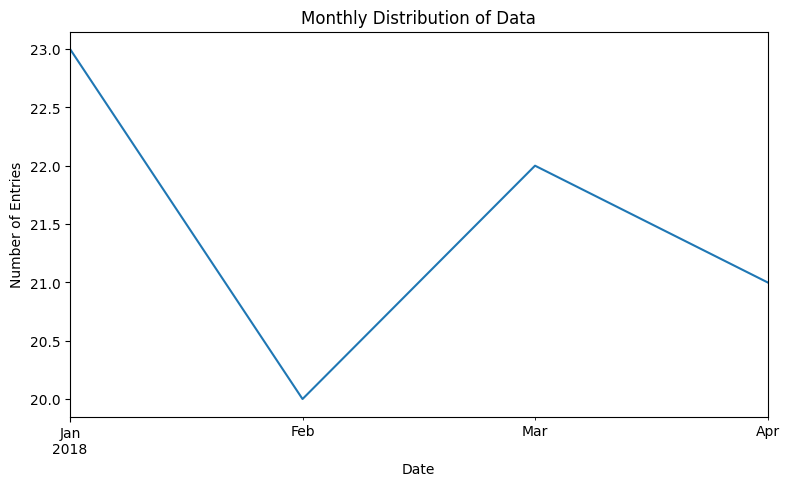

In [ ]:
import matplotlib.pyplot as plt

# Plotting the data monthly
plt.figure(figsize=(9, 5))
dataframe_resampled.plot(title='Monthly Distribution of Data')
plt.xlabel('Date')
plt.ylabel('Number of Entries')
plt.show()


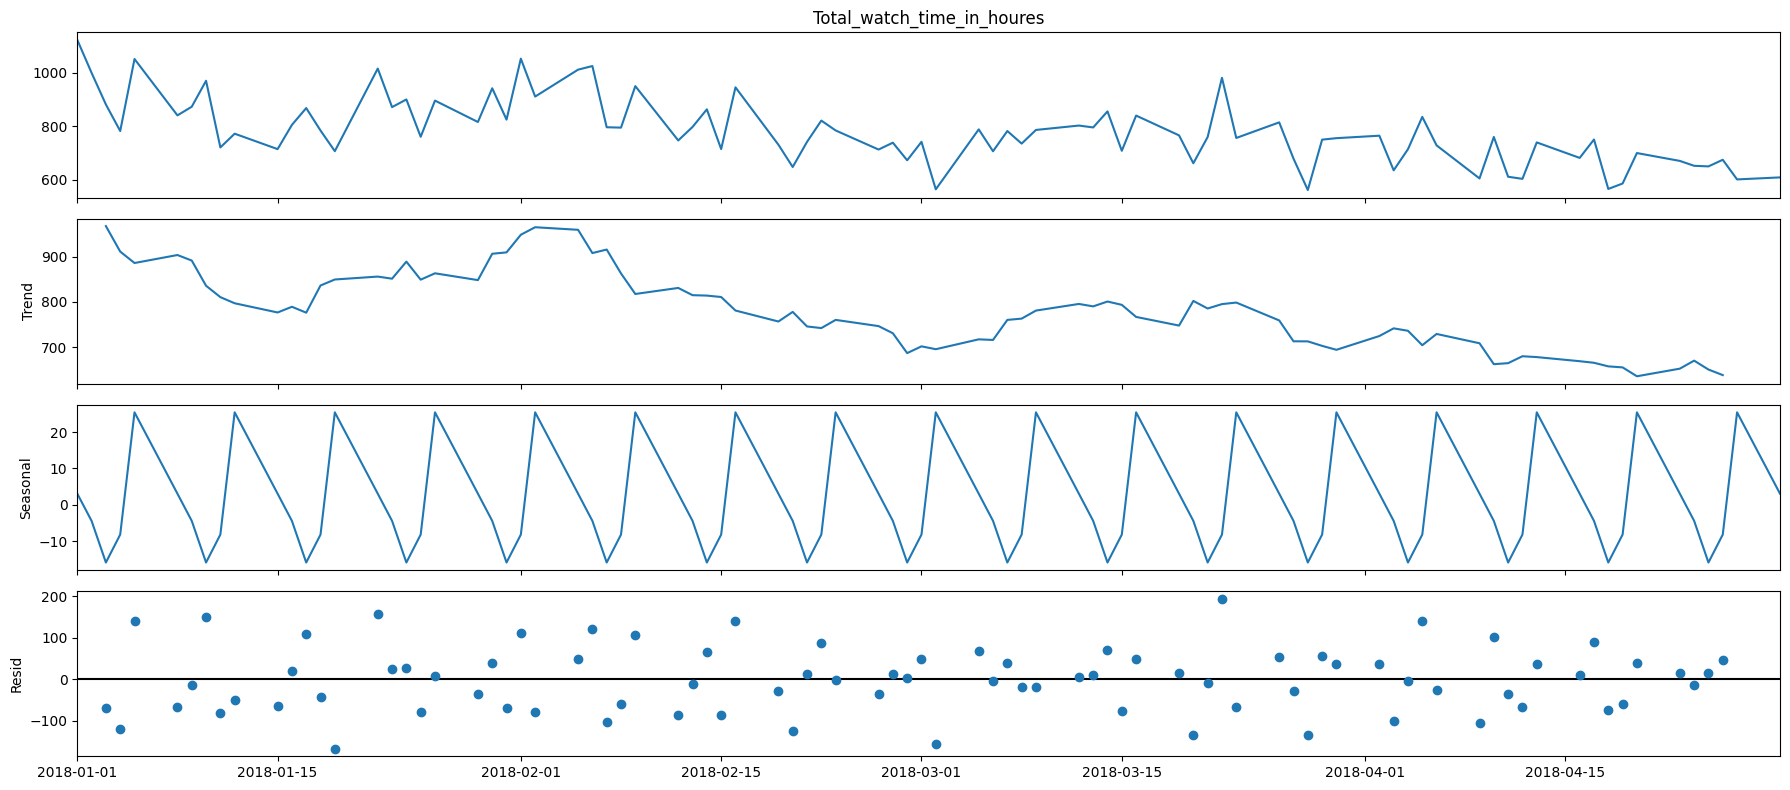

In [ ]:
# Using the previous dataset to build a prediction model for the next two months' watch time
total_watch_time = dataframe["Total_watch_time_in_houres"]

# Import necessary libraries
import statsmodels.api as sm_analysis
from pylab import rcParams

rcParams['figure.figsize'] = 18, 8

# Perform seasonal decomposition of the time series using the additive model
seasonal_decompose = sm_analysis.tsa.seasonal_decompose(total_watch_time, model='additive')

# Plot the decomposition results
fig = seasonal_decompose.plot()
plt.show()


In [ ]:
import itertools

# Define the range for p, d, q parameters
p_values = d_values = q_values = range(0, 2)

# Create combinations of p, d, q
pdq_combinations = list(itertools.product(p_values, d_values, q_values))

# Create seasonal combinations with a seasonal period of 12
seasonal_pdq_combinations = [(x[0], x[1], x[2], 12) for x in pdq_combinations]

# Print the results
print('Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq_combinations[1], seasonal_pdq_combinations[1]))
print('SARIMAX: {} x {}'.format(pdq_combinations[1], seasonal_pdq_combinations[2]))
print('SARIMAX: {} x {}'.format(pdq_combinations[2], seasonal_pdq_combinations[3]))
print('SARIMAX: {} x {}'.format(pdq_combinations[2], seasonal_pdq_combinations[4]))

Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
import itertools
import statsmodels.api as sm

def fit_sarimax(y, pdq, seasonal_pdq):
    results_list = []
    for arima_param in pdq:
        for seasonal_param in seasonal_pdq:
            try:
                model = sm.tsa.statespace.SARIMAX(y,
                                                   order=arima_param,
                                                   seasonal_order=seasonal_param,
                                                   enforce_stationarity=True,
                                                   enforce_invertibility=False)

                results = model.fit(disp=0)
                results_list.append((arima_param, seasonal_param, results.aic))
            except:
                continue
    return results_list

# Example usage
results = fit_sarimax(y, pdq_combinations, seasonal_pdq_combinations)

# Print results
for arima_param, seasonal_param, aic in results:
    print('ARIMA{} x {}12 - AIC: {}'.format(arima_param, seasonal_param, aic))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so infe

ARIMA(0, 0, 0) x (0, 0, 0, 12)12 - AIC: 1393.7197896122402
ARIMA(0, 0, 0) x (0, 0, 1, 12)12 - AIC: 1322.645008308125
ARIMA(0, 0, 0) x (0, 1, 0, 12)12 - AIC: 958.3625156123426
ARIMA(0, 0, 0) x (0, 1, 1, 12)12 - AIC: 942.0657659770475
ARIMA(0, 0, 0) x (1, 0, 0, 12)12 - AIC: 1153.5843935700404
ARIMA(0, 0, 0) x (1, 0, 1, 12)12 - AIC: 1138.4941533805595
ARIMA(0, 0, 0) x (1, 1, 0, 12)12 - AIC: 939.2933564975391
ARIMA(0, 0, 0) x (1, 1, 1, 12)12 - AIC: 940.9345100719605
ARIMA(0, 0, 1) x (0, 0, 0, 12)12 - AIC: 1303.3183113129858
ARIMA(0, 0, 1) x (0, 0, 1, 12)12 - AIC: 1267.077695804916
ARIMA(0, 0, 1) x (0, 1, 0, 12)12 - AIC: 959.4316765909434
ARIMA(0, 0, 1) x (0, 1, 1, 12)12 - AIC: 940.1851703961557
ARIMA(0, 0, 1) x (1, 0, 0, 12)12 - AIC: 1151.2466899016117
ARIMA(0, 0, 1) x (1, 0, 1, 12)12 - AIC: 1131.2434545010276
ARIMA(0, 0, 1) x (1, 1, 0, 12)12 - AIC: 937.8802530909353
ARIMA(0, 0, 1) x (1, 1, 1, 12)12 - AIC: 939.0125465397299
ARIMA(0, 1, 0) x (0, 0, 0, 12)12 - AIC: 1065.2447995635102
ARIMA(0

In [ ]:
# Function to create and fit SARIMAX model
def fit_sarimax_model(data, order, seasonal_order):
    # Create the SARIMAX model
    model = sm.tsa.statespace.SARIMAX(data,
                                       order=order,
                                       seasonal_order=seasonal_order,
                                       enforce_stationarity=True,
                                       enforce_invertibility=False)
    # Fit the model
    fitted_model = model.fit(disp=0)
    return fitted_model

# Specify the orders for the model
non_seasonal_order = (0, 1, 1)
seasonal_order = (0, 1, 1, 12)

# Fit the model using the specified orders
fitted_results = fit_sarimax_model(y, non_seasonal_order, seasonal_order)

# Print the summary of the fitted model
print(fitted_results.summary().tables[1])


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7956      0.087     -9.121      0.000      -0.967      -0.625
ma.S.L12      -1.0000      0.158     -6.339      0.000      -1.309      -0.691
sigma2      1.002e+04   1.57e-05   6.36e+08      0.000       1e+04       1e+04


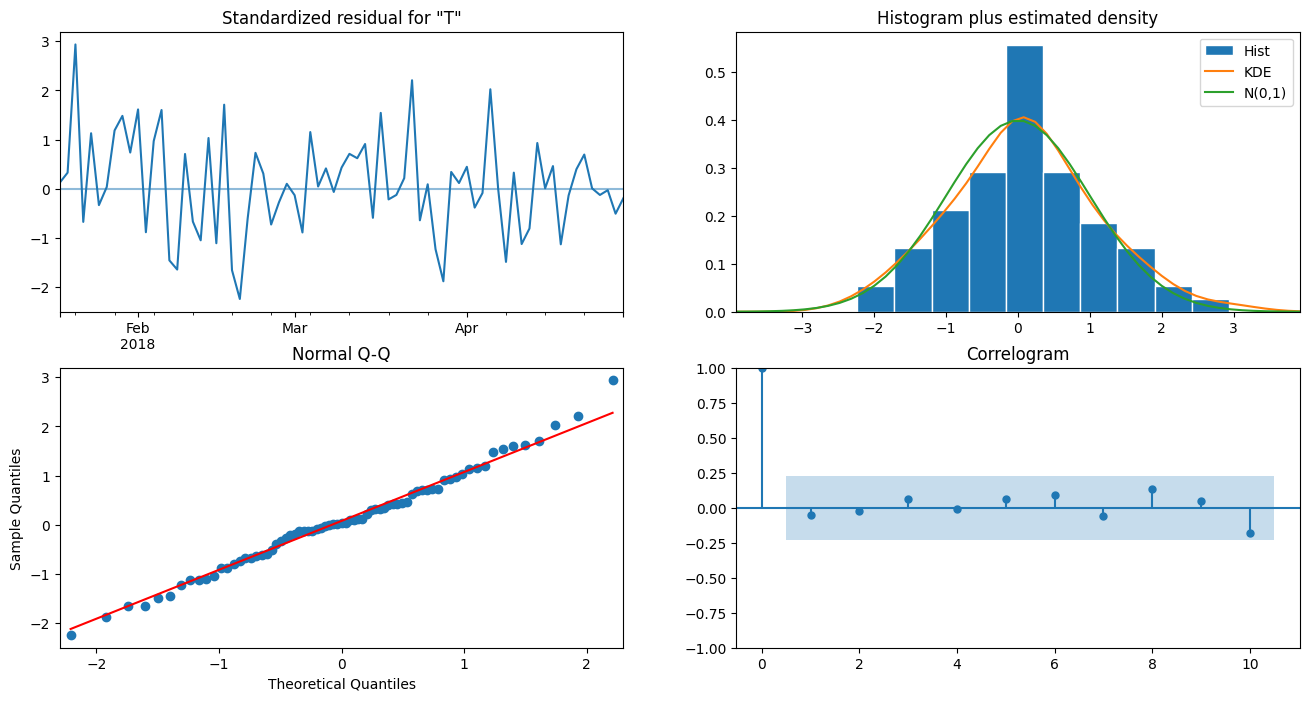

In [ ]:
# Function to plot diagnostics of the fitted model
def plot_diagnostics(fitted_model):
    # Create diagnostic plots
    fitted_model.plot_diagnostics(figsize=(16, 8))
    # Show the plots
    plt.show()

# Call the function to plot diagnostics for the fitted SARIMAX model
plot_diagnostics(fitted_results)


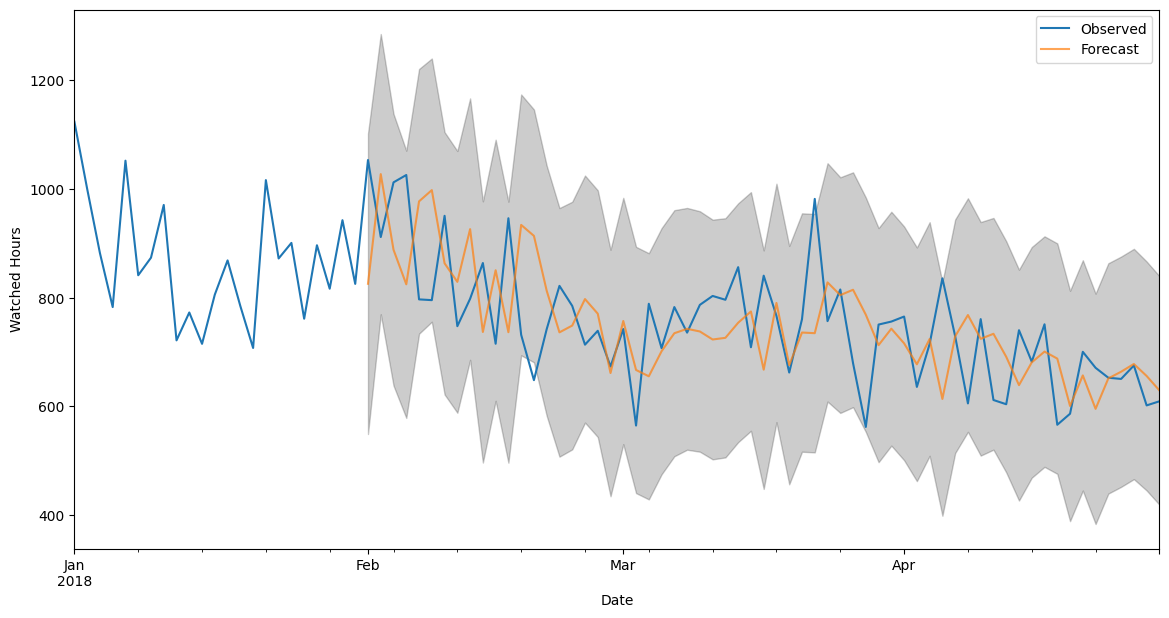

In [ ]:
# Function to plot actual data against model predictions
def plot_forecast(data, fitted_model, start_date):
    # Generate predictions from the fitted model
    predictions = fitted_model.get_prediction(start=pd.to_datetime(start_date), dynamic=False)
    confidence_intervals = predictions.conf_int()

    # Plot the observed data
    ax = data['Total_watch_time_in_houres'].plot(label='Observed', figsize=(14, 7))

    # Plot the predicted mean
    predictions.predicted_mean.plot(ax=ax, label='Forecast', alpha=0.7)

    # Fill the confidence intervals
    ax.fill_between(confidence_intervals.index,
                    confidence_intervals.iloc[:, 0],
                    confidence_intervals.iloc[:, 1], color='k', alpha=0.2)

    # Set labels and legend
    ax.set_xlabel('Date')
    ax.set_ylabel('Watched Hours')
    plt.legend()

    # Show the plot
    plt.show()

# Call the function to plot actual data against predictions
plot_forecast(dataframe, fitted_results, '2018-02-01')


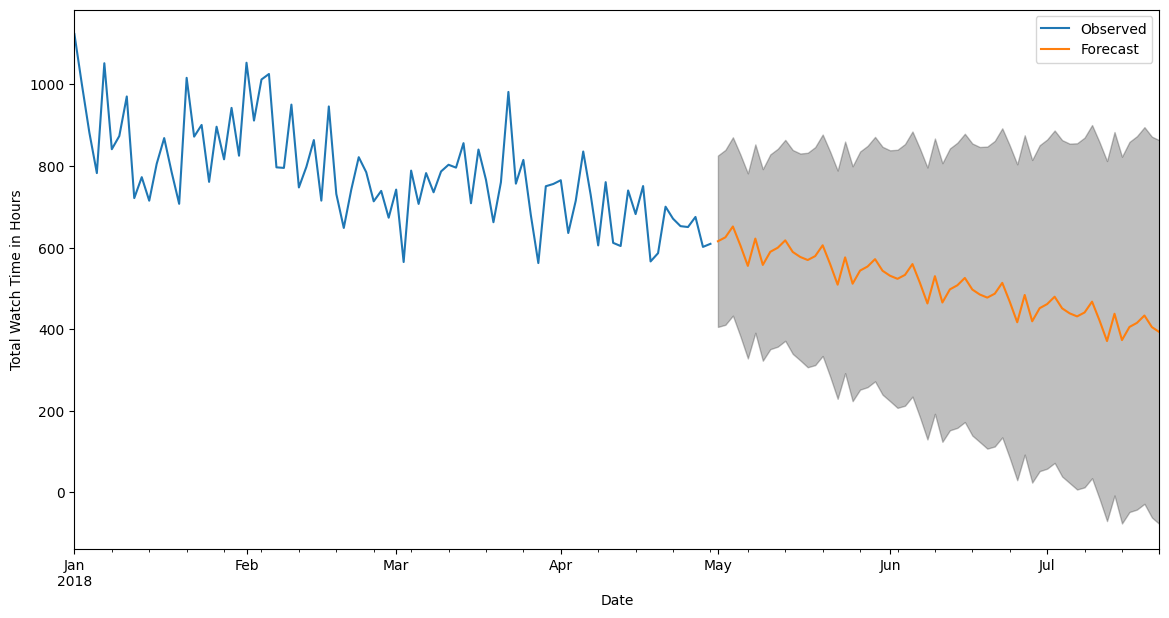

In [ ]:
# Function to show forecasts from the fitted model
def show_forecasts(fitted_model, steps, actual_data):
    # Generate forecast for the specified number of steps
    forecast = fitted_model.get_forecast(steps=steps)
    confidence_intervals = forecast.conf_int()

    # Plot the actual data
    ax = actual_data.plot(label='Observed', figsize=(14, 7))

    # Plot the forecasted mean
    forecast.predicted_mean.plot(ax=ax, label='Forecast')

    # Fill the confidence intervals
    ax.fill_between(confidence_intervals.index,
                    confidence_intervals.iloc[:, 0],
                    confidence_intervals.iloc[:, 1], color='k', alpha=0.25)

    # Set labels and legend
    ax.set_xlabel('Date')
    ax.set_ylabel('Total Watch Time in Hours')
    plt.legend()

    # Show the plot
    plt.show()

# Call the function to show forecasts for the next 60 steps
show_forecasts(fitted_results, steps=60, actual_data=y)
